In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("output_analysis.csv")
df

,file_name,mean_distance,std_distance,intersection_area,union_area,iou,angle_std_prev,angle_mean_curr,angle_std_curr,angle_mse,similarity_score,min_freq,max_freq,mean_magnitude_prev,max_magnitude_prev,mean_magnitude_curr,max_magnitude_curr,same_series_value
0,veriler-aynı-1.csv,4.037,1.548,18463.428,18830.901,0.980,116.837,-15.965,115.084,4538.084,0.022,-0.483,0.483,1375.994,33668.419,1375.309,33659.103,1
1,veriler-aynı-2.csv,12.194,3.404,18329.053,18882.958,0.971,116.837,-9.941,115.175,4765.344,0.021,-0.483,0.483,1375.994,33668.419,1372.639,33666.408,1
2,veriler-aynı-3.csv,7.047,6.141,18208.077,18959.513,0.960,113.570,-6.351,115.871,5139.841,0.019,-0.500,0.467,1406.888,34695.573,1429.136,34769.579,1
3,veriler-aynı-4.csv,2.766,2.348,18494.711,18971.579,0.975,115.664,-18.130,114.165,4384.958,0.023,-0.500,0.467,1410.948,34718.236,1420.843,34706.192,1
4,veriler-aynı-5.csv,13.788,9.214,18333.158,18884.267,0.971,114.024,-6.494,115.652,4602.170,0.022,-0.500,0.467,1378.194,34731.339,1420.678,34713.983,1
5,veriler-aynı-6.csv,11.787,3.999,18333.084,18884.191,0.971,115.725,-12.570,114.024,4601.242,0.022,-0.500,0.467,1383.742,34733.377,1378.194,34731.339,1
6,veriler-farklı-1.csv,183.016,139.310,2865.655,68623.239,0.042,115.725,-29.059,84.263,18801.334,0.005,-0.500,0.467,1383.742,34733.377,1590.598,29634.045,0
7,veriler-farklı-2.csv,243.430,108.521,19.920,27097.367,0.001,82.529,-50.878,97.571,17142.042,0.006,-0.474,0.474,1431.017,23489.803,1317.374,18949.617,0
8,veriler-farklı-3.csv,229.813,102.779,0.000,34725.000,0.000,85.590,-50.752,94.724,10719.361,0.009,-0.500,0.450,1424.527,24177.471,1321.632,19768.425,0
9,veriler-farklı-4.csv,245.175,102.032,344.375,35830.625,0.010,84.083,-50.473,94.252,13627.191,0.007,-0.500,0.450,1415.657,24619.896,1330.721,19804.530,0


In [3]:
df.isnull().sum()

file_name              0
mean_distance          0
std_distance           0
intersection_area      0
union_area             0
iou                    0
angle_std_prev         0
angle_mean_curr        0
angle_std_curr         0
angle_mse              0
similarity_score       0
min_freq               0
max_freq               0
mean_magnitude_prev    0
max_magnitude_prev     0
mean_magnitude_curr    0
max_magnitude_curr     0
same_series_value      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   file_name            11 non-null     object 
 1   mean_distance        11 non-null     float64
 2   std_distance         11 non-null     float64
 3   intersection_area    11 non-null     float64
 4   union_area           11 non-null     float64
 5   iou                  11 non-null     float64
 6   angle_std_prev       11 non-null     float64
 7   angle_mean_curr      11 non-null     float64
 8   angle_std_curr       11 non-null     float64
 9   angle_mse            11 non-null     float64
 10  similarity_score     11 non-null     float64
 11  min_freq             11 non-null     float64
 12  max_freq             11 non-null     float64
 13  mean_magnitude_prev  11 non-null     float64
 14  max_magnitude_prev   11 non-null     float64
 15  mean_magnitude_curr  11 non-null     float

In [6]:
df['same_series_value'].value_counts()

same_series_value
1    6
0    5
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
class_encoder = LabelEncoder()

In [7]:
df['gender'] = gender_encoder.fit_transform(df['gender'])
df['class_x'] = class_encoder.fit_transform(df['class'])
df 
#numerik olmayan değerler için encoding işlemi

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_x
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [15]:
X = df.drop(['same_series_value'], axis=1)
X = df.drop(columns=['file_name'])
y = df.same_series_value

In [16]:
X  #girdiler

,mean_distance,std_distance,intersection_area,union_area,iou,angle_std_prev,angle_mean_curr,angle_std_curr,angle_mse,similarity_score,min_freq,max_freq,mean_magnitude_prev,max_magnitude_prev,mean_magnitude_curr,max_magnitude_curr,same_series_value
0,4.037,1.548,18463.428,18830.901,0.980,116.837,-15.965,115.084,4538.084,0.022,-0.483,0.483,1375.994,33668.419,1375.309,33659.103,1
1,12.194,3.404,18329.053,18882.958,0.971,116.837,-9.941,115.175,4765.344,0.021,-0.483,0.483,1375.994,33668.419,1372.639,33666.408,1
2,7.047,6.141,18208.077,18959.513,0.960,113.570,-6.351,115.871,5139.841,0.019,-0.500,0.467,1406.888,34695.573,1429.136,34769.579,1
3,2.766,2.348,18494.711,18971.579,0.975,115.664,-18.130,114.165,4384.958,0.023,-0.500,0.467,1410.948,34718.236,1420.843,34706.192,1
4,13.788,9.214,18333.158,18884.267,0.971,114.024,-6.494,115.652,4602.170,0.022,-0.500,0.467,1378.194,34731.339,1420.678,34713.983,1
5,11.787,3.999,18333.084,18884.191,0.971,115.725,-12.570,114.024,4601.242,0.022,-0.500,0.467,1383.742,34733.377,1378.194,34731.339,1
6,183.016,139.310,2865.655,68623.239,0.042,115.725,-29.059,84.263,18801.334,0.005,-0.500,0.467,1383.742,34733.377,1590.598,29634.045,0
7,243.430,108.521,19.920,27097.367,0.001,82.529,-50.878,97.571,17142.042,0.006,-0.474,0.474,1431.017,23489.803,1317.374,18949.617,0
8,229.813,102.779,0.000,34725.000,0.000,85.590,-50.752,94.724,10719.361,0.009,-0.500,0.450,1424.527,24177.471,1321.632,19768.425,0
9,245.175,102.032,344.375,35830.625,0.010,84.083,-50.473,94.252,13627.191,0.007,-0.500,0.450,1415.657,24619.896,1330.721,19804.530,0


In [9]:
y #çıktı

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     0
10    0
Name: same_series_value, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split   

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size=0.8) #test ve eğitim verisi oluşturma


In [20]:
X_train

,mean_distance,std_distance,intersection_area,union_area,iou,angle_std_prev,angle_mean_curr,angle_std_curr,angle_mse,similarity_score,min_freq,max_freq,mean_magnitude_prev,max_magnitude_prev,mean_magnitude_curr,max_magnitude_curr,same_series_value
1,12.194,3.404,18329.053,18882.958,0.971,116.837,-9.941,115.175,4765.344,0.021,-0.483,0.483,1375.994,33668.419,1372.639,33666.408,1
8,229.813,102.779,0.000,34725.000,0.000,85.590,-50.752,94.724,10719.361,0.009,-0.500,0.450,1424.527,24177.471,1321.632,19768.425,0
2,7.047,6.141,18208.077,18959.513,0.960,113.570,-6.351,115.871,5139.841,0.019,-0.500,0.467,1406.888,34695.573,1429.136,34769.579,1
3,2.766,2.348,18494.711,18971.579,0.975,115.664,-18.130,114.165,4384.958,0.023,-0.500,0.467,1410.948,34718.236,1420.843,34706.192,1
10,158.732,89.664,5198.656,28488.589,0.182,83.220,-53.238,104.069,14393.140,0.007,-0.500,0.450,1436.865,25006.670,1618.005,22103.067,0
0,4.037,1.548,18463.428,18830.901,0.980,116.837,-15.965,115.084,4538.084,0.022,-0.483,0.483,1375.994,33668.419,1375.309,33659.103,1
7,243.430,108.521,19.920,27097.367,0.001,82.529,-50.878,97.571,17142.042,0.006,-0.474,0.474,1431.017,23489.803,1317.374,18949.617,0
6,183.016,139.310,2865.655,68623.239,0.042,115.725,-29.059,84.263,18801.334,0.005,-0.500,0.467,1383.742,34733.377,1590.598,29634.045,0


In [21]:
from sklearn.tree import DecisionTreeClassifier          #deneme amaçlı karar ağacı
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("Decision Tree Classifier Accuracy :",model.score(X_test,y_test))


Decision Tree Classifier Accuracy : 1.0


In [22]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5) # n_splits parametresi ile veri setini kaç farklı şekilde ayıracağımızı belirleriz.
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [23]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)    #soldaki küme eğitim verisini içerir sağ taraf ise test verisini içerir

[2 3 4 5 6 7 8] [0 1]
[0 1 4 5 6 7 8] [2 3]
[0 1 2 3 6 7 8] [4 5]
[0 1 2 3 4 5 8] [6 7]
[0 1 2 3 4 5 6 7] [8]


In [24]:
from sklearn.ensemble import RandomForestClassifier   # sınıflandırma için kütüphane ekleme
model_x = RandomForestClassifier(n_estimators=120,
                                 max_depth=12,        # Örnek değerler, deneme yanılma ile ayarlanmalı
                                      
)
model_x.fit(X_train, y_train)           #model eğitildi

RandomForestClassifier(max_depth=12, n_estimators=120)

In [25]:
model_x.score(X_test,y_test)

1.0

In [28]:
feature_importances = model.feature_importances_
results_and_values = list(zip(["feature_importances", "mean_distance"	,"std_distance",	"intersection_area",	"union_area",	"iou"]))

for result, value in results_and_values:
    print(f"{value}: {result:.5f}")           #özelliklerin ağırlıkları

ValueError: not enough values to unpack (expected 2, got 1)

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(RandomForestClassifier(n_estimators=40,max_depth=12,),X,y,cv=kf)

array([1., 1., 1., 1., 1.])

In [31]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=50),X,y,cv=3)
np.average(scores1)

1.0

In [32]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=60),X,y,cv=4)
np.average(scores2)

1.0

In [33]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=100),X,y,cv=5)
np.average(scores3)

1.0

In [34]:
y_predicted = model_x.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm =confusion_matrix(y_test, y_predicted)
cm

array([[1, 0],
       [0, 2]], dtype=int64)

In [37]:
import seaborn as sn
import matplotlib.pyplot as plt

Text(95.72222222222221, 0.5, 'gerçek değer')

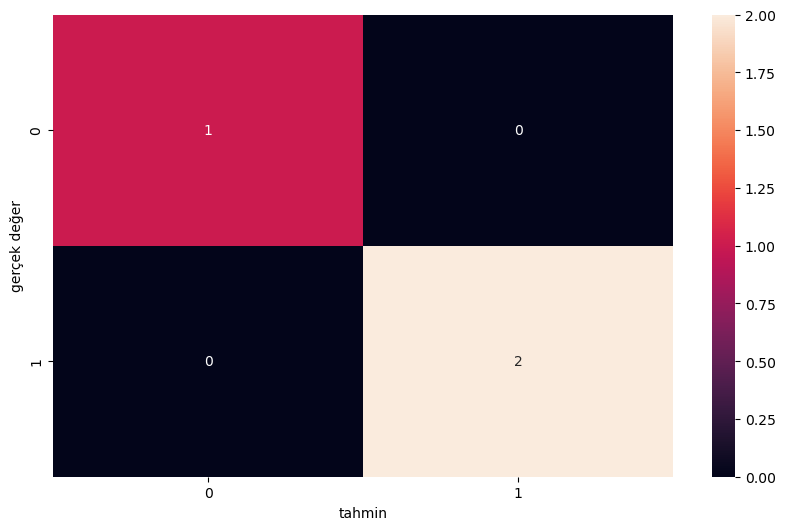

In [38]:
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('tahmin')
plt.ylabel('gerçek değer')

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

#precision bir sınıfa ait olarak tahmin edilen örnekler arasında gerçekten o sınıfa ait olanların oranını ifade eder
#recall gerçekten o sınıfa ait olan örneklerin ne kadarının doğru bir şekilde tahmin edildiğini ifade eder.
#f1-score harmonik ortalama

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle


y_scores_proba = model_x.predict_proba(X_test) # Tahmin olasılıklarını alın

# Etiketleri binarize et
num_classes = len(np.unique(y_test)) 
classes = list(range(num_classes))
y_test_bin = label_binarize(y_test, classes=classes)

# Precision-recall eğrilerini hesapla
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores_proba[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_scores_proba[:, i])

# Her sınıfın precision-recall eğrisini çiz
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for i, color in zip(range(num_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label='Precision-recall curve of class {0} (area = {1:0.2f})'
             ''.format(i, average_precision[i]))

plt.xlabel('Duyarlılık (Recall)')
plt.ylabel('Hassasiyet (Precision)')
plt.title('Çok Sınıflı Precision-Recall Eğrisi')
plt.legend(loc="best", title='Sınıf')


IndexError: index 1 is out of bounds for axis 1 with size 1